import Libraries
=

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from IPython.display import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import plotly.express as px
import plotly.io as pio
from keras.applications.inception_v3 import preprocess_input ############
from keras.applications.resnet_v2 import decode_predictions
from keras.applications.inception_v3 import InceptionV3

pio.renderers
pio.renderers.default = "notebook_connected"

Emotion Model
=

Image data Generator
with process to avoid overfitting


In [2]:
train_gen = ImageDataGenerator(
    rescale= 1./255, 
    rotation_range = 20,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip =True,
    )

test_gen = ImageDataGenerator(
    rescale= 1./255,
    )

In [3]:
train = train_gen.flow_from_directory(
    r'C:\Users\user\Desktop\imageClassification\emotion_dataset\train',
    target_size = (48,48),
    batch_size = 32,
    color_mode = 'rgb',
    shuffle=True,
    class_mode = 'categorical',
)
valid = test_gen.flow_from_directory(
    r'C:\Users\user\Desktop\imageClassification\emotion_dataset\test',
    target_size = (48,48),
    batch_size = 32,
    color_mode = 'rgb',
    shuffle=True,
    class_mode = 'categorical',
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


our labels
-

In [5]:
emotions ={0:'angry',1:'disgust',2:'fear',3:'happy',4:"neutral",5:'sad',6:'surprise'}

Sample of data
-

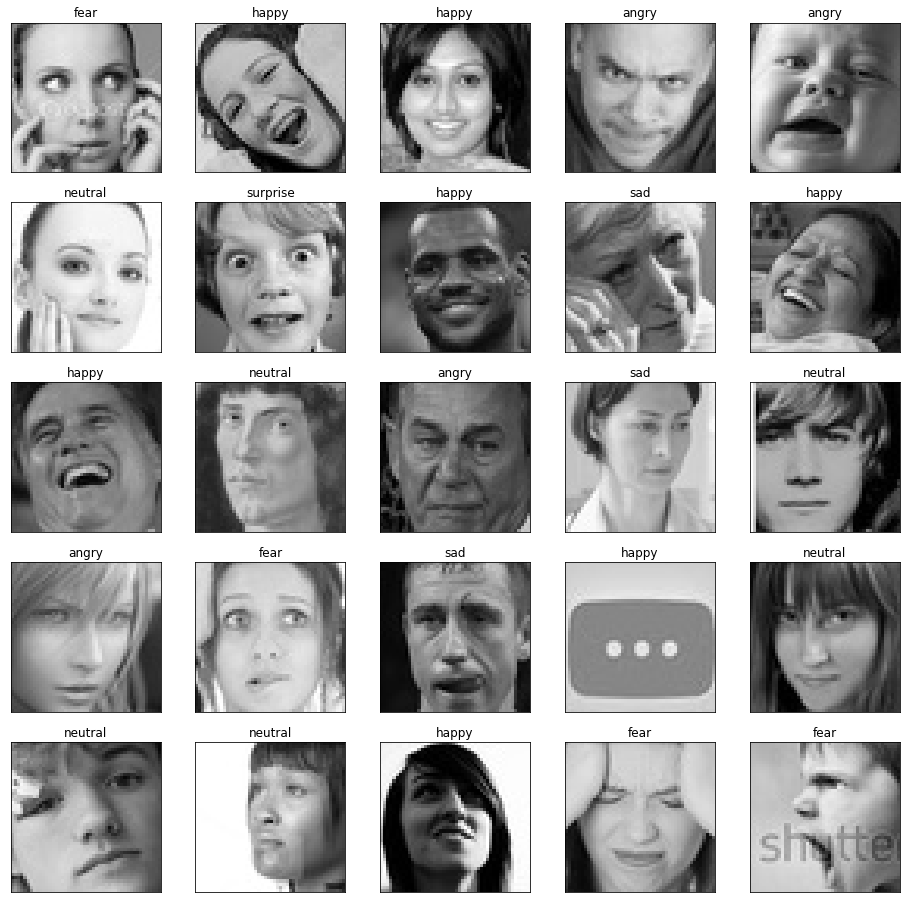

In [6]:
plt.figure(figsize=(16,16))

for i in range(1,26):
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img, label = valid.next()
    plt.imshow(img[0])
    plt.title(emotions[int(np.argmax(label[0]))])
    
plt.show()

**Graph to count each target label for the training set **

In [8]:
train_labels = train.labels 
unique, counts = np.unique(train_labels, return_counts=True)
count_label = dict(zip(unique, counts))

for_plotly = {'labels':list(emotions.values()),'count':list(count_label.values())}

fig = px.histogram(for_plotly, x="labels",y='count',nbins =20)
fig.show()

**Graph to count each target label for the testing set **

In [9]:
test_labels = valid.labels 
unique, counts = np.unique(test_labels, return_counts=True)
count_label = dict(zip(unique, counts))

for_plotly = {'labels':list(emotions.values()),'count':list(count_label.values())}

fig = px.histogram(for_plotly, x="labels",y='count',nbins =20)
fig.show()

**initialize Emotion model** 

In [13]:
model = keras.models.Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48,48,3)))  
model.add(Conv2D(64, (3, 3), activation='relu'))  
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
 
model.add(Conv2D(64, (3, 3), activation='relu'))  
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
model.add(Dropout(0.4))  
 
model.add(Conv2D(128, (3, 3), activation='relu'))  
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  

model.add(Flatten())  

#fully connected neural networks  
model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.2))  
model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.3))  

model.add(Dense(7, activation='softmax'))  


In [ ]:
early_stopping = EarlyStopping(monitor = 'val_accuracy' , mode = 'auto' ,patience = 10,restore_best_weights=True)

model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit_generator(
    train,
    epochs =200,
    validation_data = valid,
    callbacks = [early_stopping]
)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


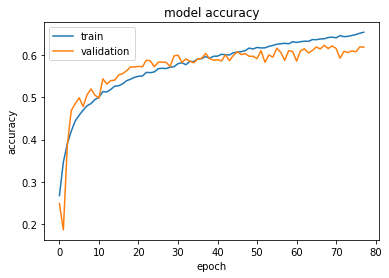

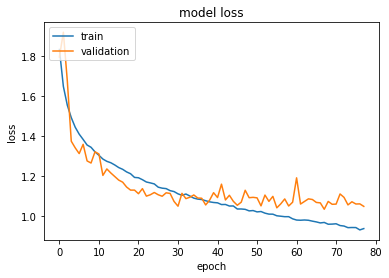

In [20]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Gender model
==

In [44]:
#split our images folder to train, valid and test set
import splitfolders
splitfolders.ratio('gender_dataset - Copy', output="shuffle", seed=1337, ratio=(.8, 0.1,0.1)) 

In [19]:
#just to prepare our dataset

import shutil
from os import listdir
from os.path import isfile, join


original = '/Users/macuser/Downloads/UTKFace/'
target = '/Users/macuser/Documents/imageClassification/'

men = [f for f in listdir(original) if f.split('_')[1]=='0']
women = [f for f in listdir(original) if f.split('_')[1]=='1']

for image in men:
    shutil.copyfile(original+image, target+'men/'+image)

for image in women:
    shutil.copyfile(original+image, target+'women/'+image)

Steps to deal with Overfitting and scale our image 

In [ ]:
from keras.applications.inception_v3 import preprocess_input ############
from keras.applications.resnet_v2 import decode_predictions
from keras.applications.inception_v3 import InceptionV3

gender_train_gen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip =True,
    fill_mode = 'reflect'
)
gender_valid_gen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip =True,
    fill_mode = 'reflect'
)
gender_test_gen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip =True,
    fill_mode = 'reflect'
)

train = gender_train_gen.flow_from_directory(
    r'C:\Users\user\Desktop\imageClassification\suffle\train',
    target_size = (224,224),
    color_mode="rgb",
    batch_size = 64,
    shuffle=True,
    class_mode = 'categorical'
)
valid = gender_valid_gen.flow_from_directory(
    r'C:\Users\user\Desktop\imageClassification\suffle\val',
    target_size = (224,224),
    color_mode="rgb",
    batch_size = 64,
    shuffle=True,
    class_mode = 'categorical'
)
test = gender_test_gen.flow_from_directory(
    r'C:\Users\user\Desktop\imageClassification\suffle\test',
    target_size = (224,224),
    color_mode="rgb",
    batch_size = 64,
    shuffle=True,
    class_mode = 'categorical'
)

**initialize Gender model**

In [24]:
model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))


In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy' ,patience=10, mode='auto')


optimizerSGD = SGD(lr=0.0001,                     
                    momentum=0.9,      
                    decay=0.0001/100,                  
                    nesterov=False)

model.compile(loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])

model.fit_generator(
    train,
    epochs = 100,
    validation_data = valid,
    callbacks = [early_stopping]
)

In [3]:

base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224,224,3))

for layer in base_model.layers:
        layer.trainable = False

gender_model = keras.models.Sequential()

base_model,####
gender_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))######
gender_model.add(MaxPooling2D(pool_size=(2, 2)))
gender_model.add(Dropout(0.2))

gender_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2, 2)))
gender_model.add(Dropout(0.3))
gender_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2, 2)))
gender_model.add(Dropout(0.3))

gender_model.add(Flatten())
gender_model.add(Dense(1024, activation='relu'))
gender_model.add(Dropout(0.5))
gender_model.add(Dense(2, activation='softmax'))


In [52]:
early_stopping = EarlyStopping(monitor='val_accuracy' ,patience=5, mode='auto')


optimizerSGD = SGD(lr=0.0001,                      # learning rate.
                    momentum=0.9,                 # parameter that accelerates SGD in the relevant direction and dampens oscillations
                    decay=0.0001/100,                    # learning rate decay over each update
                    nesterov=False)

gender_model.compile(loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])

gender_model.fit_generator(
    train,
    epochs = 100,
    validation_data = valid,
    callbacks = [early_stopping]
)

C:\Users\user\anaconda3\envs\re\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_13208\3212158496.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  gender_model.fit_generator(


Epoch 1/100
297/297 [==============================] - 177s 595ms/step - loss: 0.3623 - accuracy: 0.8398 - val_loss: 0.3275 - val_accuracy: 0.8578
Epoch 2/100
297/297 [==============================] - 183s 615ms/step - loss: 0.3580 - accuracy: 0.8388 - val_loss: 0.3349 - val_accuracy: 0.8515
Epoch 3/100
297/297 [==============================] - 178s 598ms/step - loss: 0.3573 - accuracy: 0.8422 - val_loss: 0.3333 - val_accuracy: 0.8578
Epoch 4/100
297/297 [==============================] - 180s 606ms/step - loss: 0.3546 - accuracy: 0.8410 - val_loss: 0.3282 - val_accuracy: 0.8532
Epoch 5/100
297/297 [==============================] - 177s 594ms/step - loss: 0.3497 - accuracy: 0.8458 - val_loss: 0.3249 - val_accuracy: 0.8506
Epoch 6/100
297/297 [==============================] - 177s 594ms/step - loss: 0.3527 - accuracy: 0.8409 - val_loss: 0.3314 - val_accuracy: 0.8561


**evaluate our model**

In [5]:
gender_model.evaluate(test)

38/38 [==============================] - 23s 614ms/step - loss: 0.3343 - accuracy: 0.8558


[0.3343484401702881, 0.8558178544044495]

Computer vision
==

try our model in computer vision task

In [61]:
import cv2
import time ######### akther mn 60
import numpy as np

Gender = {0:'man',1:'women'}
cap = cv2.VideoCapture('aaa.mp4')
print(cap.isOpened())
while True:

    ret, frame = cap.read()

    if not ret:
        break
    
    face_detcetor = cv2.CascadeClassifier(R'C:\Users\user\Desktop\imageClassification\haar\haarcascade_frontalface_default.xml')
    to_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = face_detcetor.detectMultiScale(to_gray,scaleFactor = 1.3 , minNeighbors = 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y-50),(x+w,y+h+10),(0,255,0),4)
        cropped = to_gray[y:y+h,x:x+w]
        cropped = np.expand_dims(cv2.resize(cropped,(224,224)),0)
        
        predict_frame = gender_model.predict(cropped)

        if predict_frame[0][int(np.argmax(predict_frame))] ==1:
            max_prop = int(np.argmax(predict_frame))

            cv2.putText(frame,Gender[max_prop],(x+5,y-20),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2,cv2.LINE_AA)
    cv2.imshow('emotion ',frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    # Release handle to the webcam
cap.release()
cv2.destroyAllWindows()

True


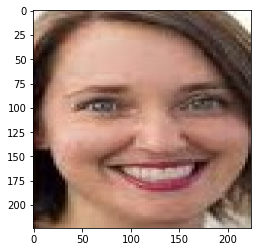

In [9]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = r"C:\Users\user\Desktop\imageClassification\tr\q\z.jpg"
img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

predict_frame = gender_model.predict(cropped)
predict_frame

plt.imshow(img)
plt.title('label: '+predict_frame[0][int(np.argmax(predict_frame))])
plt.show()


**evaluate our model**

In [19]:
gender_model.evaluate(validation)

75/75 [==============================] - 5s 65ms/step - loss: 0.7703 - accuracy: 0.7863


[0.7703456282615662, 0.7863320112228394]

age
=

In [80]:
from pathlib import Path

In [82]:
import shutil
from os import listdir
from os.path import isfile, join


original = r'UTKFace/'
target = r'C:\Users\user\Desktop\imageClassification/age/'

men = [f for f in listdir(original) if f.split('_')[0]=='0']
women = [f for f in listdir(original) if f.split('_')[0]=='1']

for image in listdir(original):
    Path(target+image.split('_')[0]).mkdir(parents=True, exist_ok=True)
    shutil.copyfile(original+image, target+image.split('_')[0]+'/'+image)



In [16]:
import os
from PIL import Image 

images_dataset ={}

def load_dataset(top_dir="input_data"):
    images_dataset = {}
    for root, dirs, files in os.walk(top_dir):
        for name in files:
            img = cv2.imread(root+'\\'+name)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img = cv2.resize(img,(224,224))
            images_dataset[root+'\\'+name] =img
    return images_dataset

dataset_dict = load_dataset(r'C:\Users\user\Desktop\imageClassification\age_dataset')
dataset = pd.DataFrame(list(dataset_dict.items()),columns=['image_path','image'])
dataset.head()

,image_path,image
0,C:\Users\user\Desktop\imageClassification\age_...,"[[[147, 118, 78], [148, 119, 80], [150, 121, 8..."
1,C:\Users\user\Desktop\imageClassification\age_...,"[[[171, 156, 153], [171, 156, 153], [171, 156,..."
2,C:\Users\user\Desktop\imageClassification\age_...,"[[[189, 159, 107], [189, 159, 107], [187, 159,..."
3,C:\Users\user\Desktop\imageClassification\age_...,"[[[4, 0, 0], [177, 173, 165], [203, 199, 189],..."
4,C:\Users\user\Desktop\imageClassification\age_...,"[[[126, 127, 121], [101, 103, 96], [71, 72, 67..."


In [19]:
dataset['age'] = dataset['image_path'].apply(lambda x: x.split('\\')[6])

**split our dataset**

In [49]:
from sklearn.model_selection import train_test_split

pixels = np.reshape(dataset["image"].to_list(), (dataset.shape[0],224,224,3))

y = pd.to_numeric(dataset['age'])

x_train, x_test,y_train,y_test = train_test_split(pixels,y,test_size = .2 ,random_state =42)

In [50]:
traingen = ImageDataGenerator(rescale=1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 horizontal_flip= True
                )
valgen = ImageDataGenerator(rescale=1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 horizontal_flip= True
                )

testgen = ImageDataGenerator(rescale=1./255)

age_train_ds = traingen.flow(x_train,y_train,
                        batch_size = 32
                       )

age_val_ds = valgen.flow(x_test,y_test,
                        batch_size = 32
                       )



In [ ]:
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import LeakyReLU
age_base_model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
output_layer = age_base_model.get_layer("block5_conv3").output

for layer in age_base_model.layers:
        layer.trainable = False

age_model = keras.models.Sequential([
age_base_model,
Conv2D(32,(3,3), activation="relu"),
Conv2D(32,(3,3), activation="relu"),
Dropout(0.30),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation = LeakyReLU(alpha=0.3)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(1, activation = None, name = 'age_output')

])

age_model.summary()

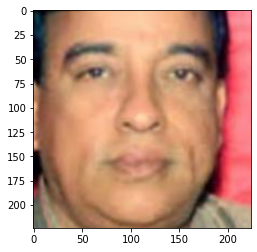

1

In [58]:
from PIL import Image
import numpy


plt.imshow(x_train[1])
plt.show()
y_train[1]

In [70]:
age_model.compile(
    tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss = ['mae'],
    metrics =['mse'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10) 

history = age_model.fit(age_train_ds,
            epochs=100,
            batch_size = 64,
            validation_data=age_val_ds,
            callbacks = [es])

Epoch 1/100
593/593 [==============================] - 175s 294ms/step - loss: 6.5361 - mse: 81.8712 - val_loss: 6.6500 - val_mse: 90.6883
Epoch 2/100
593/593 [==============================] - 174s 294ms/step - loss: 6.5760 - mse: 81.2313 - val_loss: 6.7545 - val_mse: 92.0419
Epoch 3/100
593/593 [==============================] - 176s 296ms/step - loss: 6.6043 - mse: 83.1772 - val_loss: 6.8208 - val_mse: 91.5488
Epoch 4/100
593/593 [==============================] - 175s 295ms/step - loss: 6.5095 - mse: 81.2253 - val_loss: 6.7005 - val_mse: 90.7222
Epoch 5/100
593/593 [==============================] - 175s 295ms/step - loss: 6.5133 - mse: 80.9230 - val_loss: 6.7704 - val_mse: 93.9723
Epoch 6/100
593/593 [==============================] - 175s 295ms/step - loss: 6.5402 - mse: 81.6154 - val_loss: 6.6862 - val_mse: 89.6905
Epoch 7/100
593/593 [==============================] - 175s 295ms/step - loss: 6.5312 - mse: 81.2531 - val_loss: 6.6074 - val_mse: 88.8179
Epoch 8/100
593/593 [======

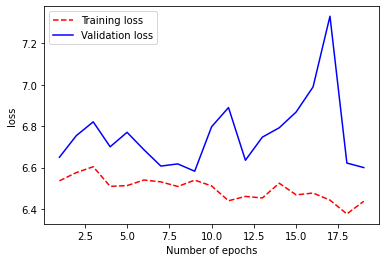

In [77]:
loss = history.history['loss']
val_loss = history.history['val_loss']

nEpochs = range(1,len(val_loss)+1)

plt.plot(nEpochs,loss,'r--',label='Training loss')
plt.plot(nEpochs,val_loss,'b-',label='Validation loss')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.show()

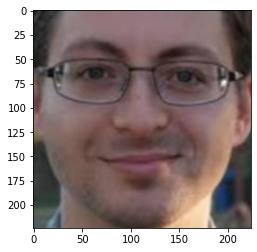

In [78]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = r"C:\Users\user\Desktop\imageClassification\split_age\train\27\27_0_0_20170104193647416.jpg.chip.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = img / 255.
img = cv2.resize(img,(224,224))
plt.imshow(img)

plt.show()

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)


In [65]:
predict_frame = age_model.predict(img_batch)
predict_frame[0][0]


28.238258

In [69]:
import cv2
import time 
import numpy as np

Gender = {0:'man',1:'women'}
cap = cv2.VideoCapture('aaa.mp4')
print(cap.isOpened())
while True:

    ret, frame = cap.read()

    if not ret:
        break
    
    face_detcetor = cv2.CascadeClassifier(R'C:\Users\user\Desktop\imageClassification\haar\haarcascade_frontalface_default.xml')
    to_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = face_detcetor.detectMultiScale(to_gray,scaleFactor = 1.3 , minNeighbors = 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y-50),(x+w,y+h+10),(0,255,0),4)
        cropped = to_gray[y:y+h,x:x+w]
        cropped = cropped / 255
        cropped = np.expand_dims(cv2.resize(cropped,(224,224)),0)
        
        predict_frame = age_model.predict(cropped)

        max_prop = int(predict_frame[0][0])

        cv2.putText(frame,str(max_prop),(x+5,y-20),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2,cv2.LINE_AA)
    cv2.imshow('emotion ',frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    # Release handle to the webcam
cap.release()
cv2.destroyAllWindows()

True
